# Homework 4

In [1]:
import astropy.units as u
import astropy.constants as c
from astropy.coordinates import SkyCoord
from astropy.time import Time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
%matplotlib inline


import shapely
from shapely.geometry import LineString, Point

In [2]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rc('axes', labelsize=14)
plt.rc('axes', labelweight='bold')
plt.rc('axes', titlesize=16)
plt.rc('axes', titleweight='bold')
plt.rc('font', family='sans-serif')

# Problem 1

Consider a square potential well of width w, with walls of height V:
V
0
E
w
Using Schr  ̈odinger’s equation, it can be shown that the allowed energies E of a single quantum
particle of mass m trapped in the well are solutions of
tan

w 2 mE/2 ̄h 2 =
{  ( V − E ) /E for the even numbered states,
− E/ ( V − E ) for the odd numbered states,
where the states are numbered starting from 0, with the ground state being state 0, the rst
excited state being state 1, and so forth.
a) For an electron (mass 9.1094 × 10 − 31 kg) in a well with V = 20 eV and w = 1 nm, write a
Python program to plot the three quantities
y 1 = tan

w 2 mE/2 ̄h 2 , y 2 =
√ V − E
E , y 3 = −
√ E
V − E ,
on the same graph, as a function of E from E = 0 to E = 20 eV. From your plot make
approximate estimates of the energies of the rst six energy levels of the particle.
b) Write a second program to calculate the values of the rst six energy levels in electron
volts to an accuracy of 0.001 eV using binary search

a) For an electron (mass 9.1094 × 10 − 31 kg) in a well with V = 20 eV and w = 1 nm, write a
Python program to plot the three quantities
y 1 = tan

w 2 mE/2 ̄h 2 , y 2 =
√ V − E
E , y 3 = −
√ E
V − E ,
on the same graph, as a function of E from E = 0 to E = 20 eV. From your plot make
approximate estimates of the energies of the rst six energy levels of the particle.


In [3]:
m = c.m_e
V = 20*u.electronvolt
w = 1*u.m*1e-9
def y1(E):
    val = ((w**2) * m * E)/(2*((c.hbar.to(u.electronvolt*u.s))**2))
    v = val.decompose()
    return np.tan(np.sqrt(v).value)
def y2(E):
    return np.sqrt((V-E)/(E))
def y3(E):
    return -1*np.sqrt((E)/(V-E))

/home/kelcey/anaconda3/envs/hera/lib/python3.9/site-packages/astropy/units/quantity.py:611: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/kelcey/anaconda3/envs/hera/lib/python3.9/site-packages/astropy/units/quantity.py:611: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


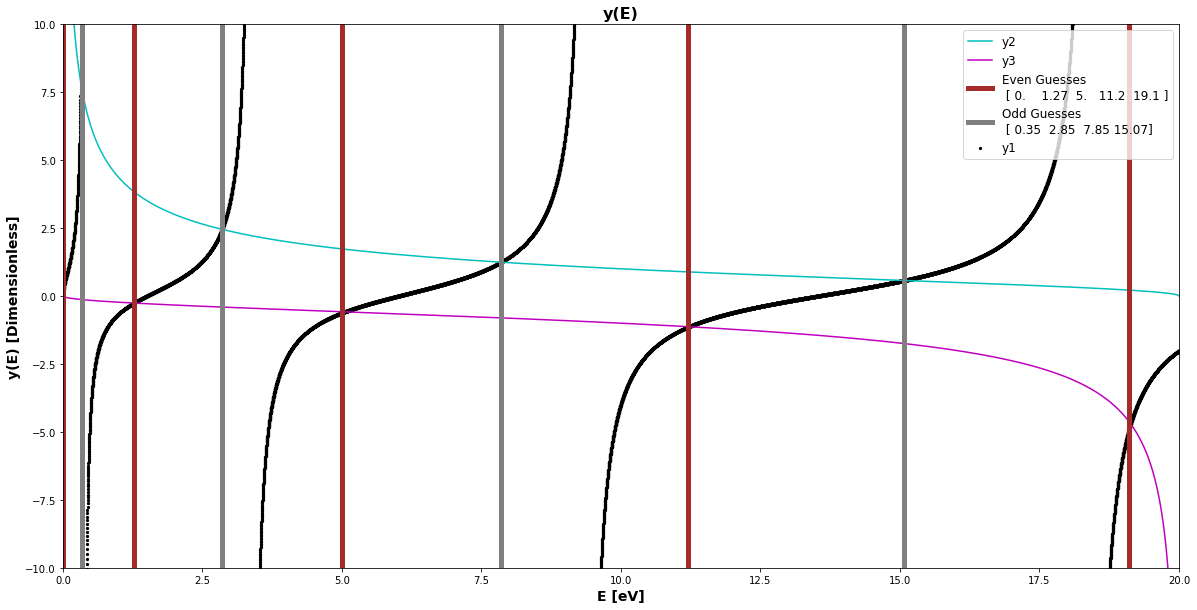

In [118]:
plt.rcParams['figure.figsize'] = (20, 10)
Es = np.arange(0,20,0.001)*u.electronvolt
plt.scatter(Es, y1(Es), label = 'y1', c= 'k', marker = 'o', s = 5)
plt.plot(Es, y2(Es), label = 'y2', c = 'c')
plt.plot(Es, y3(Es), label = 'y3', c = 'm')
plt.ylim(-10,10)
plt.xlim(0,20)
y1s = y1(Es)
y2s = y2(Es)
y3s = y3(Es)
#Getting a rough guess 

odd_guesses = [0.35, 2.85, 7.85, 15.07]*u.electronvolt
even_guesses = [0, 1.27, 5.0, 11.2, 19.1]*u.electronvolt
#idx = np.argwhere(np.diff(np.sign(y1s - y2s))).flatten()
#plt.plot(Es[idx], y1s[idx], 'bo', label = 'Even Intersections', markersize = 10)
#evens = Es[idx]
#idx = np.argwhere(np.diff(np.sign(y1s - y3s))).flatten()
#plt.plot(Es[idx][0::2], y3s[idx][0::2], 'ro', label = 'Odd Intersections', markersize = 10)
#odds = Es[idx][0::2]
for eguess in even_guesses:
    plt.axvline(eguess.value, c= 'brown', label = f'Even Guesses \n {even_guesses.value}', lw = 5)
for oguess in odd_guesses:
    plt.axvline(oguess.value, c= 'grey', label = f'Odd Guesses \n {odd_guesses.value}', lw=5)
plt.title('y(E)')
plt.xlabel('E [eV]')
plt.ylabel('y(E) [Dimensionless]')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize = 'large', loc = 'upper right');

In [53]:
energies = [even_guesses[0], odd_guesses[0], even_guesses[1], odd_guesses[1], even_guesses[2], odd_guesses[2],
           even_guesses[3]]
n=0
print('Energy Estimations: Initial Guesses')
for e in energies:
    print(f'\n n={n}: {e}')
    n+=1

Energy Estimations: Initial Guesses

 n=0: 0.0 eV

 n=1: 0.37 eV

 n=2: 1.27 eV

 n=3: 2.85 eV

 n=4: 5.0 eV

 n=5: 7.85 eV

 n=6: 11.2 eV


b) Write a second program to calculate the values of the rst six energy levels in electron
volts to an accuracy of 0.001 eV using binary search

The binary method we covered in class was designed to find roots at 0. We need to adapt that method to a function equal to another function. To make sure that I have the method fully grasped, I will start with a very simple example and build from there. 


Below, I am creating a binary search method function for the case where we want to find roots of a function. I will run this function on

$y = x^3$

because this is a simple function with a clear root at x=0.

In [102]:
def binary(x1,x2,f,accuracy):
    #If they have opposite signs, the product should evaluate to False.
    if ((x1== x2) & (x1==0)) | (x1*x2>0) != True:
        midpoint = (x1+x2)//2
        fprime = f(midpoint)
        if fprime*f(x1)>0:
            x1 = midpoint
            if abs(x1-x2)>accuracy:
                return (x1+x2)//2
                print(x1, x2)
            else:
                return binary(x1,x2,f, accuracy)
                print(x1, x2)
        else:
            x2 = midpoint
            if abs(x1-x2)>accuracy:
                return (x1+x2)//2
                print(x1, x2)
            else:
                return  binary(x1,x2,f, accuracy)
                print(x1, x2)
    else:
        print('f(x1) and f(x2) must have opposite signs')
            

In [103]:
def f(x):
    return x**3 

In [107]:
a = binary(x1 = .05,x2 = -.05,f = f, accuracy = 0.01)
print(f'The Binary Search Method found a root at {a}.')

The Binary Search Method found a root at 0.0.


<ipython-input-121-904441b39435>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.axvline(0, C = 'gray')
<ipython-input-121-904441b39435>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.axhline(0, C = 'gray')


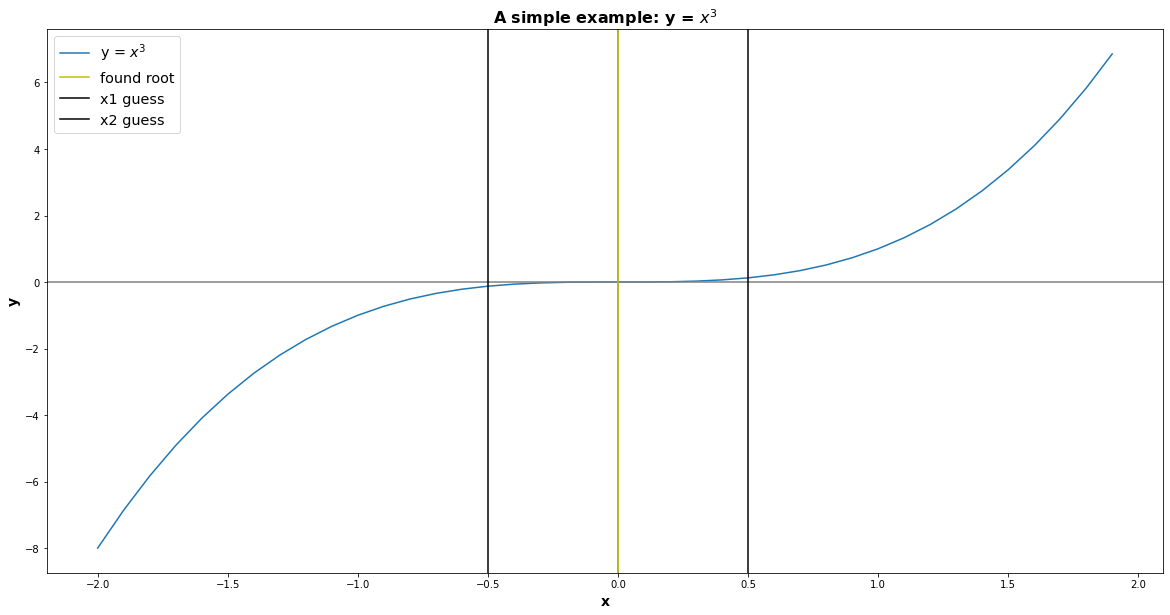

In [121]:
x = np.arange(-2,2, 0.1)
y = x**3
plt.plot(x,y, label = 'y = $x^3$')

plt.axvline(0, C = 'gray')
plt.axhline(0, C = 'gray')
plt.axvline(a, c = 'y', label = 'found root')

plt.axvline(0.5, c = 'k', label = 'x1 guess')
plt.axvline(-0.5, c = 'k', label = 'x2 guess')

plt.legend(fontsize = 'x-large')
plt.xlabel('x')
plt.ylabel('y')
plt.title('A simple example: y = $x^3$');

Now we need to adapt this function. We do not want to find where the function is 0, but where the tangent function intersects the curves.

# Problem 2

Problem 2: Asymmetric quantum well
Quantum mechanics can be formulated as a matrix problem and solved on a computer us-
ing linear algebra methods. Suppose, for example, we have a particle of mass M in a one-
dimensional quantum well of width L, but not a square well like the examples you’ve probably
seen before. Suppose instead that the potential V ( x ) varies somehow inside the well:
1
x = 0 x = L
V(x)
We cannot solve such problems analytically in general, but we can solve them on the computer.
In a pure state of energy E, the spatial part of the wavefunction obeys the time-independent
Schr  ̈odinger equation ˆHψ ( x ) = Eψ ( x ) , where the Hamiltonian operator ˆH is given by
ˆH = −  ̄h 2
2M
d 2
dx 2 + V ( x ) .
For simplicity, let’s assume that the walls of the well are innitely high, so that the wavefunc-
tion is zero outside the well, which means it must go to zero at x = 0 and x = L. In that case,
the wavefunction can be expressed as a Fourier sine series thus:
ψ ( x ) =
∞
∑
n = 1
ψn sin πnx
L ,
where ψ1 , ψ2 , . . . are the Fourier coefcients. Noting that, for m, n positive integers
∫ L
0
sin πmx
L sin πnx
L dx =
{L/2 if m = n,
0 otherwise,
it can be showm that the Schr  ̈odinger equation ˆHψ = Eψ implies that
∞
∑
n = 1
ψn
∫ L
0
sin πmx
L ˆH sin πnx
L dx = 1
2 LEψm .
Hence, dening a matrix H with elements
Hmn = 2
L
∫ L
0
sin πmx
L ˆH sin πnx
L dx
= 2
L
∫ L
0
sin πmx
L
[
−  ̄h 2
2M
d 2
dx 2 + V ( x )
]
sin πnx
L dx,
the Schr  ̈odinger’s equation can be written in matrix form as Hψ = Eψ, where ψ is the vec-
tor ( ψ1 , ψ2 , . . . ) . Thus ψ is an eigenvector of the Hamiltonian matrix H with eigenvalue E. If we
can calculate the eigenvalues of this matrix, then we know the allowed energies of the particle
in the well.
2
a) For the case V ( x ) = ax/L, the integral in Hmn can be evaluated analytically to nd a
general expression for the matrix elements Hmn (where the matrix is real and symmetric):
Hmn =



0 if m ̸ = n and both even or both odd,
− 8amn
π 2 ( m 2 − n 2 ) 2 if m ̸ = n and one is even, one is odd,
a
2 + π 2  ̄h 2 m 2
2ML 2 if m = n.
Write a Python program to evaluate your expression for Hmn for arbitrary m and n when
the particle in the well is an electron, the well has width 5  ̊A, and a = 10 eV. (The mass
and charge of an electron are 9.1094 × 10 − 31 kg and 1.6022 × 10 − 19 C respectively.)
b) The matrix H is in theory innitely large, so we cannot calculate all its eigenvalues. But
we can get a pretty accurate solution for the rst few of them by cutting off the matrix
after the rst few elements. Modify the program you wrote for part (a) above to create
a 10 × 10 array of the elements of H up to m, n = 10. Calculate the eigenvalues of this
matrix using the appropriate function from numpy.linalg and hence print out, in units
of electron volts, the rst ten energy levels of the quantum well, within this approxima-
tion. You should nd, for example, that the ground-state energy of the system is around
5.84 eV. (Hint: Bear in mind that matrix indices in Python start at zero, while the indices
in standard algebraic expressions, like those above, start at one. You will need to make
allowances for this in your program.)
c) Modify your program to use a 100 × 100 array instead and again calculate the rst ten
energy eigenvalues. Comparing with the values you calculated in part (c), what do you
conclude about the accuracy of the calculation?
d) Now modify your program once more to calculate the wavefunction ψ ( x ) for the ground
state and the rst two excited states of the well. Use your results to make a graph with
three curves showing the probability density | ψ ( x )| 2 as a function of x in each of these
three states. Pay special attention to the normalization of the wavefunction—it should
satisfy the condition  L
0 | ψ ( x )| 2 dx = 1. Is this true of your wavefunction

a) For the case V ( x ) = ax/L, the integral in Hmn can be evaluated analytically to nd a
general expression for the matrix elements Hmn (where the matrix is real and symmetric):
Hmn =



0 if m ̸ = n and both even or both odd,
− 8amn
π 2 ( m 2 − n 2 ) 2 if m ̸ = n and one is even, one is odd,
a
2 + π 2  ̄h 2 m 2
2ML 2 if m = n.
Write a Python program to evaluate your expression for Hmn for arbitrary m and n when
the particle in the well is an electron, the well has width 5  ̊A, and a = 10 eV. (The mass
and charge of an electron are 9.1094 × 10 − 31 kg and 1.6022 × 10 − 19 C respectively.)


b) The matrix H is in theory innitely large, so we cannot calculate all its eigenvalues. But
we can get a pretty accurate solution for the rst few of them by cutting off the matrix
after the rst few elements. Modify the program you wrote for part (a) above to create
a 10 × 10 array of the elements of H up to m, n = 10. Calculate the eigenvalues of this
matrix using the appropriate function from numpy.linalg and hence print out, in units
of electron volts, the rst ten energy levels of the quantum well, within this approxima-
tion. You should nd, for example, that the ground-state energy of the system is around
5.84 eV. (Hint: Bear in mind that matrix indices in Python start at zero, while the indices
in standard algebraic expressions, like those above, start at one. You will need to make
allowances for this in your program.)


c) Modify your program to use a 100 × 100 array instead and again calculate the rst ten
energy eigenvalues. Comparing with the values you calculated in part (c), what do you
conclude about the accuracy of the calculation?


d) Now modify your program once more to calculate the wavefunction ψ ( x ) for the ground
state and the rst two excited states of the well. Use your results to make a graph with
three curves showing the probability density | ψ ( x )| 2 as a function of x in each of these
three states. Pay special attention to the normalization of the wavefunction—it should
satisfy the condition  L
0 | ψ ( x )| 2 dx = 1. Is this true of your wavefunction